# HOMOMORPHIC
## Alessio Proietti, Scienze Computazionali, Dip. di Matematica e Fisica Roma TRE

### tesina del corso di Cybersecurity - Anno Accademico 2022-2023 - Laurea magistrale in Ing. Inf.
<img alt="Logo RomaTRE" src="https://www.uniroma3.it/wp-content/uploads/2017/02/logo-uniroma3.jpg" width=30% height=30% title="Logo Roma TRE"/>

*Abstract*

La ricerca sulla Crittografia Omomorfa si propone di sviluppare primitive in grado di eseguire funzioni su dati cifrati e restituire un output cifrato. Le prospettive di questo campo sono ambiziose e le applicazioni sono molteplici, tuttavia le sfide e le limitazioni delle varie proposte di schemi omomorfici descritte nella letteratura sono ben note e rigorose. Nel corso degli anni sono state introdotte diverse generazioni di schemi, ciascuna promettendo di risolvere i problemi della generazione precedente in termini di efficienza e di profondità dei circuiti risolvibili in modo omomorfico. Tuttavia lo sforzo ha contribuito a chiarire alcuni presupposti teorici che rendono possibili gli schemi proposti, essendo tutte le soluzioni di successo basate su generalizzazioni o varianti dello stessi problema matematico, che è il problema *GLWE*.

Le implementazioni di questi schemi non mancano, tuttavia spesso presentano incongruenze o incompletezze nonostante i notevoli sforzi di standardizzazione (vedi [12]). Questo studio si concentra sul problema dell'esponenziazione modulare, in previsione di future applicazioni nella ricerca di protocolli per la firma digitale distribuita. Sono state valutate l'usabilità e i limiti di diverse librerie note che implementano schemi appartenenti a generazioni diverse, ma che fondamentalmente operano tutte su numeri interi.

**Sommario**
1. RSA Omomorfo
2. TFHE e precursori
3. Esperimenti in TFHE con lib TFHE-rs 
4. Esperimenti in BGV con lib SEAL-python
5. Lavoro Futuro 
6. Conclusione
7. Appendice
8. Bibliografia


## 1. RSA Omomorfo 

RSA (Rivest–Shamir–Adleman) è un crittosistema a chiave asimmetrica descritto pubblicamente nel 1977 ma noto all'agenzia di intelligence britannica *GCHQ* dal 1973. È uno dei sistemi più diffusi in assoluto, le sue chiavi sono tipicamente a 2048 e 4096 bit e una delle sue applicazioni più note è nei certificati SSL nella sua forma di algoritmo di firma digitale. 

La sicurezza di RSA, ancorché mai dimostrata, si basa sulla difficoltà della fattorizzazione di interi che, nella sua versione decisionale, appartiene alla classe *NP* mentre non è opinione diffusa che sia anche *NP-complete* (non sono note dimostrazioni di questo fatto).

L' operazione fondamentale dell' unico round di RSA è l' esponenziale modulare. È una operazione pesante per client limitati computazionalmente e pertanto potrebbe essere esternalizzata (e quindi la firma stessa di un messaggio) ad un provider di risorse computazionali remote. È essenziale che l' esponente non sia pubblico perché con esso un avversario può firmare qualsiasi messaggio desideri; pertanto, mentre è assolutamente necessario che sia cifrato l' esponente, questo non è richiesto per il messaggio stesso ma possiamo in una prima analisi richiedere che siano entrambi cifrati. Un algoritmo molto efficiente per l' esponenziazione in generale è l' algoritmo *square and multiply* (e varianti, tipo *Montgomery Powering Ladder*) e nel seguito analizzeremo solo questo.



## 2. TFHE e Precursori
Secondo Wikipedia [2] è possible rintracciare dei precursori alle generazioni, per così dire, canoniche di FHE (*Fully Homomorphic Encryption*) in una serie di crittosistemi classsici che esibiscono proprietà parziali di omomorficità in quanto il problema è ben noto sin dal 1978 [3]. È bene tuttavia considerare come punto di svolta nel campo il grande lavoro sui reticoli algebrici di Craig Gentry pubblicato nel 2009 [4]; egli introdusse una tecnica detta di *bootstrap* con la quale è possibile trasformare alcuni schemi (tipo il suo) che possono valutare solo polinomi di grado basso in schemi pienamente omomorfi che possono eseguire operazioni arbitrarie. 

Nel suo schema ogni operazione polinomiale sul cifrato introduce nel cifrato stesso rumore che alla fine (cioè dopo un numero di operazioni omomorfiche) sovrasta completamente il segnale nel cifrato e il messaggio originale viene perso. Il *boostrap* è in grado di rimuovere il rumore durante il calcolo ma è una operazione inefficiente e rende impraticabile l' operazione. 

Nella seconda generazione di schemi omomorfi (e ci concentriamo solo su quelli basati sul problema RLWE/LWE) spiccano BGV e BFV, i quali lavorano sui interi ed esibiscono lenta crescita del rumore la quale può essere ulteriormente gestita con l' approccio a livelli (infatti si dice che sono *levelled*). Sono noti tentativi matematici di *bootstrap* per BGV (ed BFV) [9][10] e, usando le library più di successo, si sono avanzate implementazioni ma quest' ultime non sono mai state rese pubbliche. Nel seguito ci concentreremo su BGV lavorando con un *wrapper* in python3 alla nota lib MS SEAL.


Nella terza generazione il lavoro di GSW (Craig Gentry, Amit Sahai, and Brent Waters) ha introdotto nuove idee che hanno portato al fondamentale avanzamento in FHEW e TFHE. Nella quarta generazione è stato introdotto il calcolo sui reali con CKKS ed è al momento migliore per valutare approssimazioni polinomiali.

Ritornando alla terza generazione, TFHE (cioè DM/CGGI) è in grado di simulare NAND e la propria decifratura e questo lo rende universale per il calcolo di qualsiasi circuito in maniera cifrata a meno di *bootstrap*. La novità di questo cifrario è che *bootstrap* estremamente efficiente e veloce [19] nonché programmabile (*programmable bootstrap* consente di calcolare una funzione sul cifrario mentre si riduce il noise). 

TFHE (e la sua genesi da LWE) è perfettamente illustrato in una serie di blog post pubblicati da Zama (https://www.zama.ai/) sul loro sito [1]. TFHE-rs [11] è una libreria avanzata scritta in Rust, pubblicata da Zama e che permette di calcolare qualsiasi funzione (ci sono dei caveat) su interi e su bit. 

Useremo nel prossimo paragrafo TFHE-rs per provare a calcolare l' esponenziale modulare.

## 3. Esperimenti in TFHE con TFHE-rs lib 

TFHE-rs implementa TFHE (DM/CGGI) e cioè un cifrario di crittografia omomorfa sul toro orientato ai bit. 
La matematica soggiacente è piuttosto complessa ma è ben illustrata in [1]. TFHE-rs espone una API ad alto livello per operare su interi ad 8 bit e si è usata questa nel seguito. Inoltre è stato usato un aspetto fondamentale di TFHE, cioè il *programmable bootstrap* che permette di calcolare **qualsiasi** funzione in modo omomorfo fintanto che si tratti di una funzione ad una variabile ed è descritto in [14] con applicazioni al machine learning omomorfo.

In questo lavoro non è stato provato a seguire la stessa strategia su interi con più di 8 bit e non si esclude possa essere usata la stessa strategia per essi; il fatto cruciale che si è usato in questa sperimentazione con TFHE-rs è stato ipotizzare che il messaggio da firmare sia in chiaro.

Esempio di parametri RSA a 8-bit:

- p = 13
- q = 17
- n = 17 * 13 = 221 
- lcm(p-1, q-1) = 48
- e = 5
- d = 29
- de = 1 mod 48

In [2]:
:dep tfhe = { version = "0.2.4", features = [ "boolean", "shortint", "integer", "x86_64-unix" ] }

In [3]:
use tfhe::{ConfigBuilder, generate_keys, set_server_key, FheUint8};
use tfhe::prelude::*;
use std::u64;
use std::time::{Duration, Instant};

In [ ]:
fn square_and_multiply(base:u64, exponent :u64, modulus: u64) -> u64 {

    if exponent == 0 {
        return base;
    }

    let mut z = 1;
    let mut b = base % modulus;
    let mut e = exponent;

    for _i in 0..exponent-1 {
        if e %2 == 1 {
            z = (z*b) % modulus;
        }

        e=e >> 1;
        b = (b*b)% modulus;
    }

    return z;
}

In [25]:
fn main() {
    let config = ConfigBuilder::all_disabled()
        .enable_default_uint8()
        .build();

    let start = Instant::now();

    // Client-side
    let (client_key, server_key) = generate_keys(config);
    
    let key_generation_time: Duration = start.elapsed();


    let clear_e = 29u8; // esponente segreto aka chiave
    let m = 42u8; // il messaggio da firmare, è in CHIARO!
    let n = 221u8; // il modulo, fa parte della chiave pubblica.

    // cifro la chiave
    let e = FheUint8::encrypt(clear_e, &client_key);
    

    let mod_pow = |value: u64| {
        square_and_multiply(m.into(), value, n.into()) as u64
    };

    //Server-side
    set_server_key(server_key);
    
    // map applica TFHE programmable bootstrapping.
    // Call it magic!
    let result = e.map(mod_pow);
    let sqmul_time: Duration = start.elapsed();


    //Client-side
    let decrypted_result: u8 = result.decrypt(&client_key);

    print!("key generation: {:?}, square multiply/programmable bootstrapping: {:?}", key_generation_time, sqmul_time-key_generation_time);
    
    //42^29 mod 221 = 9 mod 221
    assert_eq!(decrypted_result, 9);

In [26]:
main();

Error: Subprocess terminated with status: signal: 9 (SIGKILL)

key generation: 216.999534608s, square multiply/programmable bootstrapping: 269.832381243s

## 4. Esperimenti in BGV con SEAL-python lib

BGV è uno scheme di crittografia omomorfa a livelli che lavora su dati di tipo intero, una buona introduzione matematica(corredata da rimandi alla letteratura più rigorosa) è presente sul blog post in [14] ma daremo comunque qualche dettaglio ulteriore in questa sede. MS SEAL è una library pubblicata e sviluppata in C++ da Microsoft Research per operare su dati cifrati, espone l' API per accedere a tre cifrari per calcolo omomorfo cioè BGV, BFV e CKKS. 

Non c'è un supporto ufficiale per python perciò si è ricorsi ad una implementazione sperimentale open source e che è pubblica sul web [13].

Quello che è importante sapere sul binomio MS SEAL e BGV è come i dati sono codificati in un plaintext e quali sono i parametri di inizializzazione dello schema. 

Innanzitutto occorre impostare il paramentro che determina il numero N di slot di plaintext (ovvero il grado del polinomio di plaintext) e in SEAL può essere 4096, 8192, 16384, 32768. Il plaintext deve essere immaginato come una matrice N/2 x 2 di interi. Tutte le slot sono occupate da interi modulo T dove T è un intero primo compatibile con N. Infine occorre sapere che ciphertext è una coppia di polinomi il cui grado è un prodotto di primi (vedi figura 4 in appendice) compatibile con N. Bisogna precisare che T è calcolato dalla library e apparentemente non è possibile per l' utente scegliere un T, se fosse possibile allora si potrebbe eseguire l' esponenziazione modulare.

ModSwitch è una operazione di BGV che SEAL espone all' utente per accorciare la catena di primi per poter ridurre il rumore e continuare a operare su un cifrario. Inoltre è possibile ruotare le righe della matrice di plaintext e anche ruotare le colonne. La prima di queste due operazioni è quella che si è tentato di usare nel seguito per calcolare l' esponenziazione modulare. 

Per sfruttare le peculiarità di BGV su MS SEAL con Batch Encoding è stato elaborato il seguente protocollo / algortimo. Tuttavia senza *bootstrap* è impossibile implementarlo senza apportare modifiche modifiche, ne riportiamo uno pseudocodice prima di riportare un tentativo di implementazione in python.

**Algoritmo Square&Multiply con vettori:**

$M \ \leftarrow \ messaggio \\ e \ \leftarrow \ LSB( (esponente)_{2} ) $ 
<br>
$\\ plaintext \ \leftarrow 1 + (M-1)\times e$ 
<br>
$\\ ciphertext \ \leftarrow \ BGVEncrypt(plaintext)$
<br>
$\\ z \ \leftarrow \ BGVEncrypt([1,...,1])$
<br>
per $lunghezza(plaintext)$ iterazioni  **esegui**:
<br>
    $\\ \ \ \ \ z \ \leftarrow \ z^2$
<br>
    $\\ \ \ \ \ z \ \leftarrow \ z \times ciphertext $
<br>
    $\\ \ \ \ \ ciphertext \ \leftarrow \ RuotaVersoDestra(ciphertext)$
<br>
**restituisci** $z[lunghezza(plaintext)-1]$

Perché funziona? Benché evidentemente inefficiente l' algoritmo calcola correttamente l' esponenziale anche se il modulo dell' anello di base sfugge controllo dell' utente perché è un parametro implicito in MS SEAL. 

Possiamo infatti riscrivere $(1 + (M-1) \times e)\times z$ per capirlo. Innanzitutto concentriamoci su $z[l-1]$ al passo $i$, lo chiamiamo semplicemente $z$. 

Al passo $i$ si ha che $[(1 + (M-1) \times e)][l-1]$ è $1+(M-1)\times e_{l-1-i}$ ma se riscriviamo $(1+(M-1)\times e_{l-1-i})\times z$ come $(1-e_{l-1-i})\times z + e_{l-1-i}\times M \times z$ allora abbiamo un passo equivalente a quello di square and multiply standard. Per visualizzare correttamente gli oggetti presenti nell' algortimo è possibile vedere nell' appendice alcune immagini.

In [2]:
from seal import *
import numpy as np
from timeit import default_timer as timer

In [26]:
# È una funzione di supporto per disegnare correttamente un plaintext con la codifica Batch di BGV

def print_vector(vector, row_size):
    print('-'*40)
    print('[ ', end='')
    for i in range(0, 10):
        print(vector[i], end=', ')
    print('... ]')
    print('[ ', end='')
    for i in range(0, 10):
        print(vector[i+row_size], end=', ')
    print('... ]')
    print('-'*40)

In [39]:
def toy_exponentiation():
    start = timer()

    parms = EncryptionParameters(scheme_type.bgv)
    poly_modulus_degree = 8192
    parms.set_poly_modulus_degree(poly_modulus_degree)
    parms.set_coeff_modulus(CoeffModulus.BFVDefault(poly_modulus_degree))
    parms.set_plain_modulus(PlainModulus.Batching(poly_modulus_degree, 20))
    context = SEALContext(parms)

    keygen = KeyGenerator(context)
    secret_key = keygen.secret_key()
    public_key = keygen.create_public_key()
    relin_keys = keygen.create_relin_keys()
    galois_keys= keygen.create_galois_keys();

    encryptor = Encryptor(context, public_key)
    evaluator = Evaluator(context)
    decryptor = Decryptor(context, secret_key)

    batch_encoder = BatchEncoder(context)
    slot_count = batch_encoder.slot_count()
    row_size = int(slot_count / 2)
    print(f'Plaintext matrix row size: {row_size}')


    ###############################################
    
    print("andiamo a calcolare in parallelo 5^8 e 4^8.")
    z_matrix = [0]*slot_count
    z_matrix[0]=5
    z_matrix[1]=4
    z_matrix[2]=6


    print_vector(z_matrix, row_size)

    encoded_z_matrix = batch_encoder.encode(z_matrix)
    x_z_matrix = encryptor.encrypt(encoded_z_matrix)
    
    evaluator.square_inplace(x_z_matrix)
    evaluator.relinearize_inplace(x_z_matrix, relin_keys)
    evaluator.mod_switch_to_next_inplace(x_z_matrix)
    
    evaluator.square_inplace(x_z_matrix)
    evaluator.relinearize_inplace(x_z_matrix, relin_keys)
    evaluator.mod_switch_to_next_inplace(x_z_matrix)
    
    evaluator.square_inplace(x_z_matrix)
    evaluator.relinearize_inplace(x_z_matrix, relin_keys)
    evaluator.mod_switch_to_next_inplace(x_z_matrix)

    #evaluator.mod_switch_to_next_inplace(x_z_matrix)
    

    x_res = x_z_matrix
    
    decrypted_result = decryptor.decrypt(x_res)
    results = batch_encoder.decode(decrypted_result)

    end = timer()
    
    
    assert results[0]==5**8
    assert results[1]==4**8

    print_vector(results, row_size)


    print(f"per calcolare 5^8 e 4^8 è stato impiegato un tempo di ~{round(end - start,2)} secondi")
    print(f"")


toy_exponentiation()

Plaintext matrix row size: 4096
andiamo a calcolare in parallelo 5^8 e 4^8.
----------------------------------------
[ 5, 4, 6, 0, 0, 0, 0, 0, 0, 0, ... ]
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... ]
----------------------------------------
----------------------------------------
[ 390625, 65536, -384770, 0, 0, 0, 0, 0, 0, 0, ... ]
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... ]
----------------------------------------
per calcolare 5^8 e 4^8 è stato impiegato un tempo di ~0.43 secondi



In [6]:
def homomorphic_exponentiation():

    # Inizializzo tutti i parametri per la cifratura BGV con batching

    parms = EncryptionParameters(scheme_type.bgv)
    poly_modulus_degree = 8192
    parms.set_poly_modulus_degree(poly_modulus_degree)
    parms.set_coeff_modulus(CoeffModulus.BFVDefault(poly_modulus_degree))
    parms.set_plain_modulus(PlainModulus.Batching(poly_modulus_degree, 20))
    context = SEALContext(parms)

    keygen = KeyGenerator(context)
    secret_key = keygen.secret_key()
    public_key = keygen.create_public_key()
    relin_keys = keygen.create_relin_keys()
    galois_keys= keygen.create_galois_keys();

    encryptor = Encryptor(context, public_key)
    evaluator = Evaluator(context)
    decryptor = Decryptor(context, secret_key)

    batch_encoder = BatchEncoder(context)
    slot_count = batch_encoder.slot_count()
    row_size = int(slot_count / 2)
    print(f'Plaintext matrix row size: {row_size}')


    ###############################################
    
    M=42 # il blocco di messaggio da cifrare
    
    exponent_matrix = np.array([0] * slot_count)

    # esponente segreto: 3
    exponent_matrix[0] = 1
    exponent_matrix[1] = 0
    exponent_matrix[2] = 1
    exponent_matrix[3] = 0

    coefficient_matrix = 1+(M-1)*exponent_matrix # calcolo matriciale con numpy 
    coefficient_matrix = coefficient_matrix.tolist() # posso codificare solo liste con il codificatore

    encoded_coefficient_matrix = batch_encoder.encode(coefficient_matrix)
    x_coefficient_matrix = encryptor.encrypt(encoded_coefficient_matrix)
    
    ###############################################

    z_matrix = [0]*slot_count
    z_matrix[0]=5


    for i in range(slot_count):
        
        evaluator.square_inplace(x_z_matrix)
        evaluator.relinearize_inplace(x_z_matrix, relin_keys)
        
        try:
            evaluator.mod_switch_to_next_inplace(x_z_matrix)
        except ValueError:
            print(ValueError)
        finally:
            break
        
        
        evaluator.multiply_inplace(x_z_matrix, x_coefficient_matrix)
        evaluator.relinearize_inplace(x_z_matrix, relin_keys);

        try:
            evaluator.mod_switch_to_next_inplace(x_z_matrix)
        except ValueError:
            print(ValueError)
        finally:
            break
        
        evaluator.rotate_rows_inplace(x_coefficient_matrix, 1, galois_keys)

    
    decrypted_result = decryptor.decrypt(x_z_matrix)
    results = batch_encoder.decode(decrypted_result)

    print(results[slot_count-1])

homomorphic_exponentiation()

Plaintext matrix row size: 4096
--------------------------------------------------
[ 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... ]
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... ]
**************************************************
0.45705879900015134
390625


## 5. Lavoro Futuro 
Non sono state esaminate le performance e l' usabilità o l' API di HElib [5] che è una lib scritta in C++ e che implementa CKKS (*bootstrapped*) e BGV, inoltre non è noto all' autore del presente lavoro se HElib offra BGV con *bootstrap*.
Un' altra library molto promettente, scritta in Go, è *lattigo*. 

Lattigo, che fu inzialmente sviluppata da EPFL Laboratory for Data Security e il cui sviluppo è successivamente passato di mano a https://tuneinsight.com/, offre *multiparty homomorphic encryption* basato su reticoli e in particolare implementa CKKS (cioè aritmetica sui reali) e BGV/BFV. 

Di fondamentale importanza è Openfhe [8] che ha come obbiettivo quello di implementare i futuri standard di crittografia omomorfica post-quantum, sarebbe interessante esplorarne le applicazioni per la firma distribuita.

## 6. Conclusione e Osservazioni

TFHE (implementato come TFHE-rs da Zama)sembra essere effettivamente più versatile e superiori rispetto ai vecchi schemi omomorfi ma non si analizzato in questo lavoro le particolarità di CKKS che anche sembra un cifrario promettente nonché di recente ideazione. Per quanto riguarda la sicurezza, sono noti in letteratura attacchi a cifrari come CKKS ([18]) e in generale crittanalisi matematica dei problemi sui reticoli ma in questo lavoro non sono stati analizzati.

## 7. Appendice

 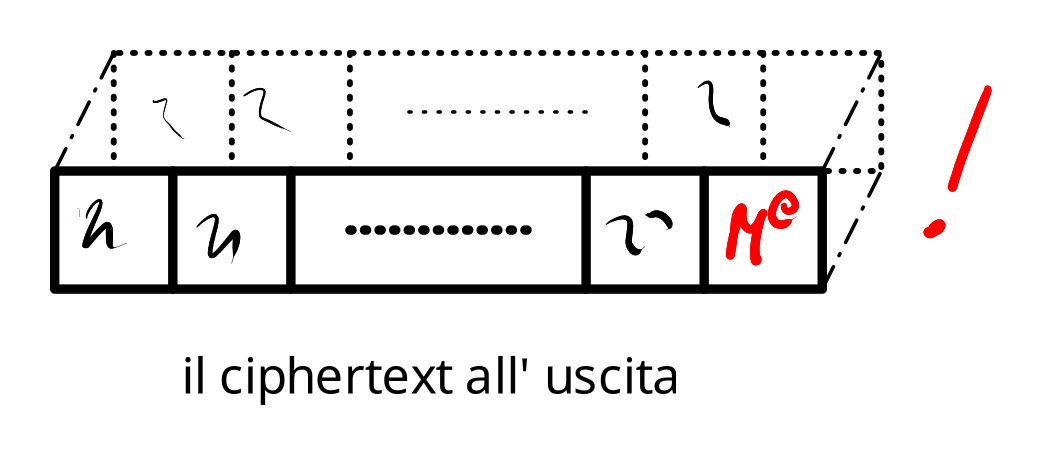 **figura 1**

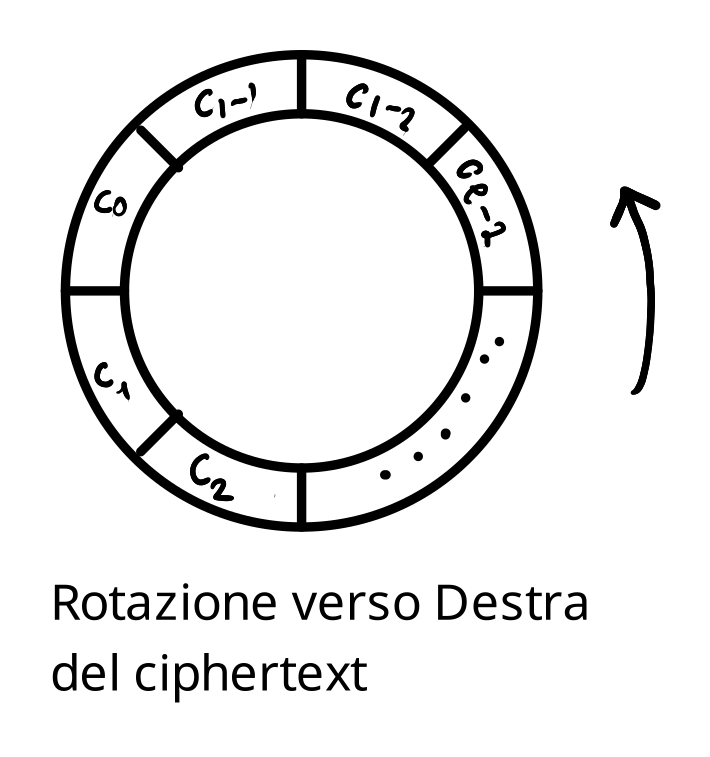 **figura 2** 

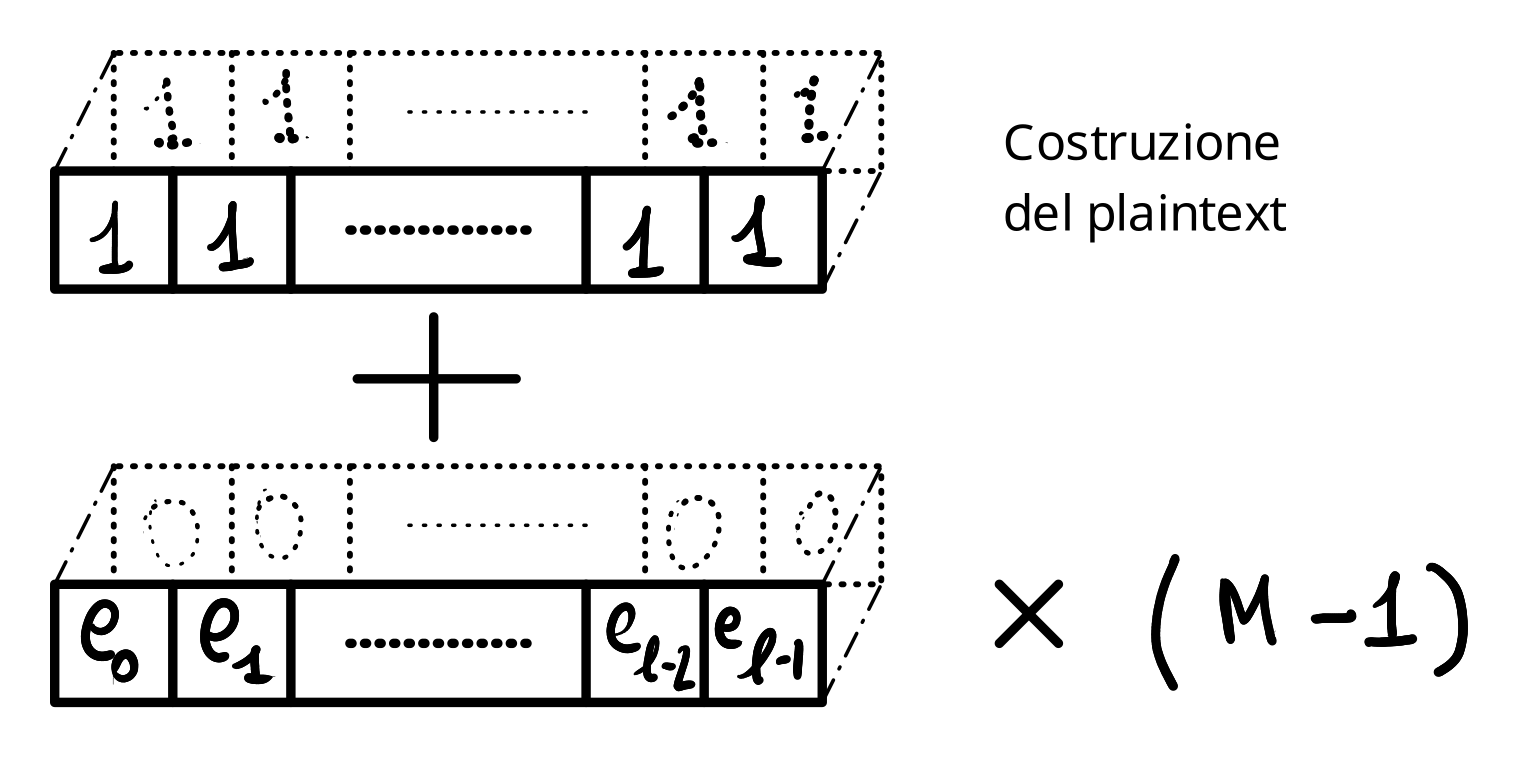 **figura 3** 

la seguente immagine è presa da [14] e i relativi diritti sono degli autori.
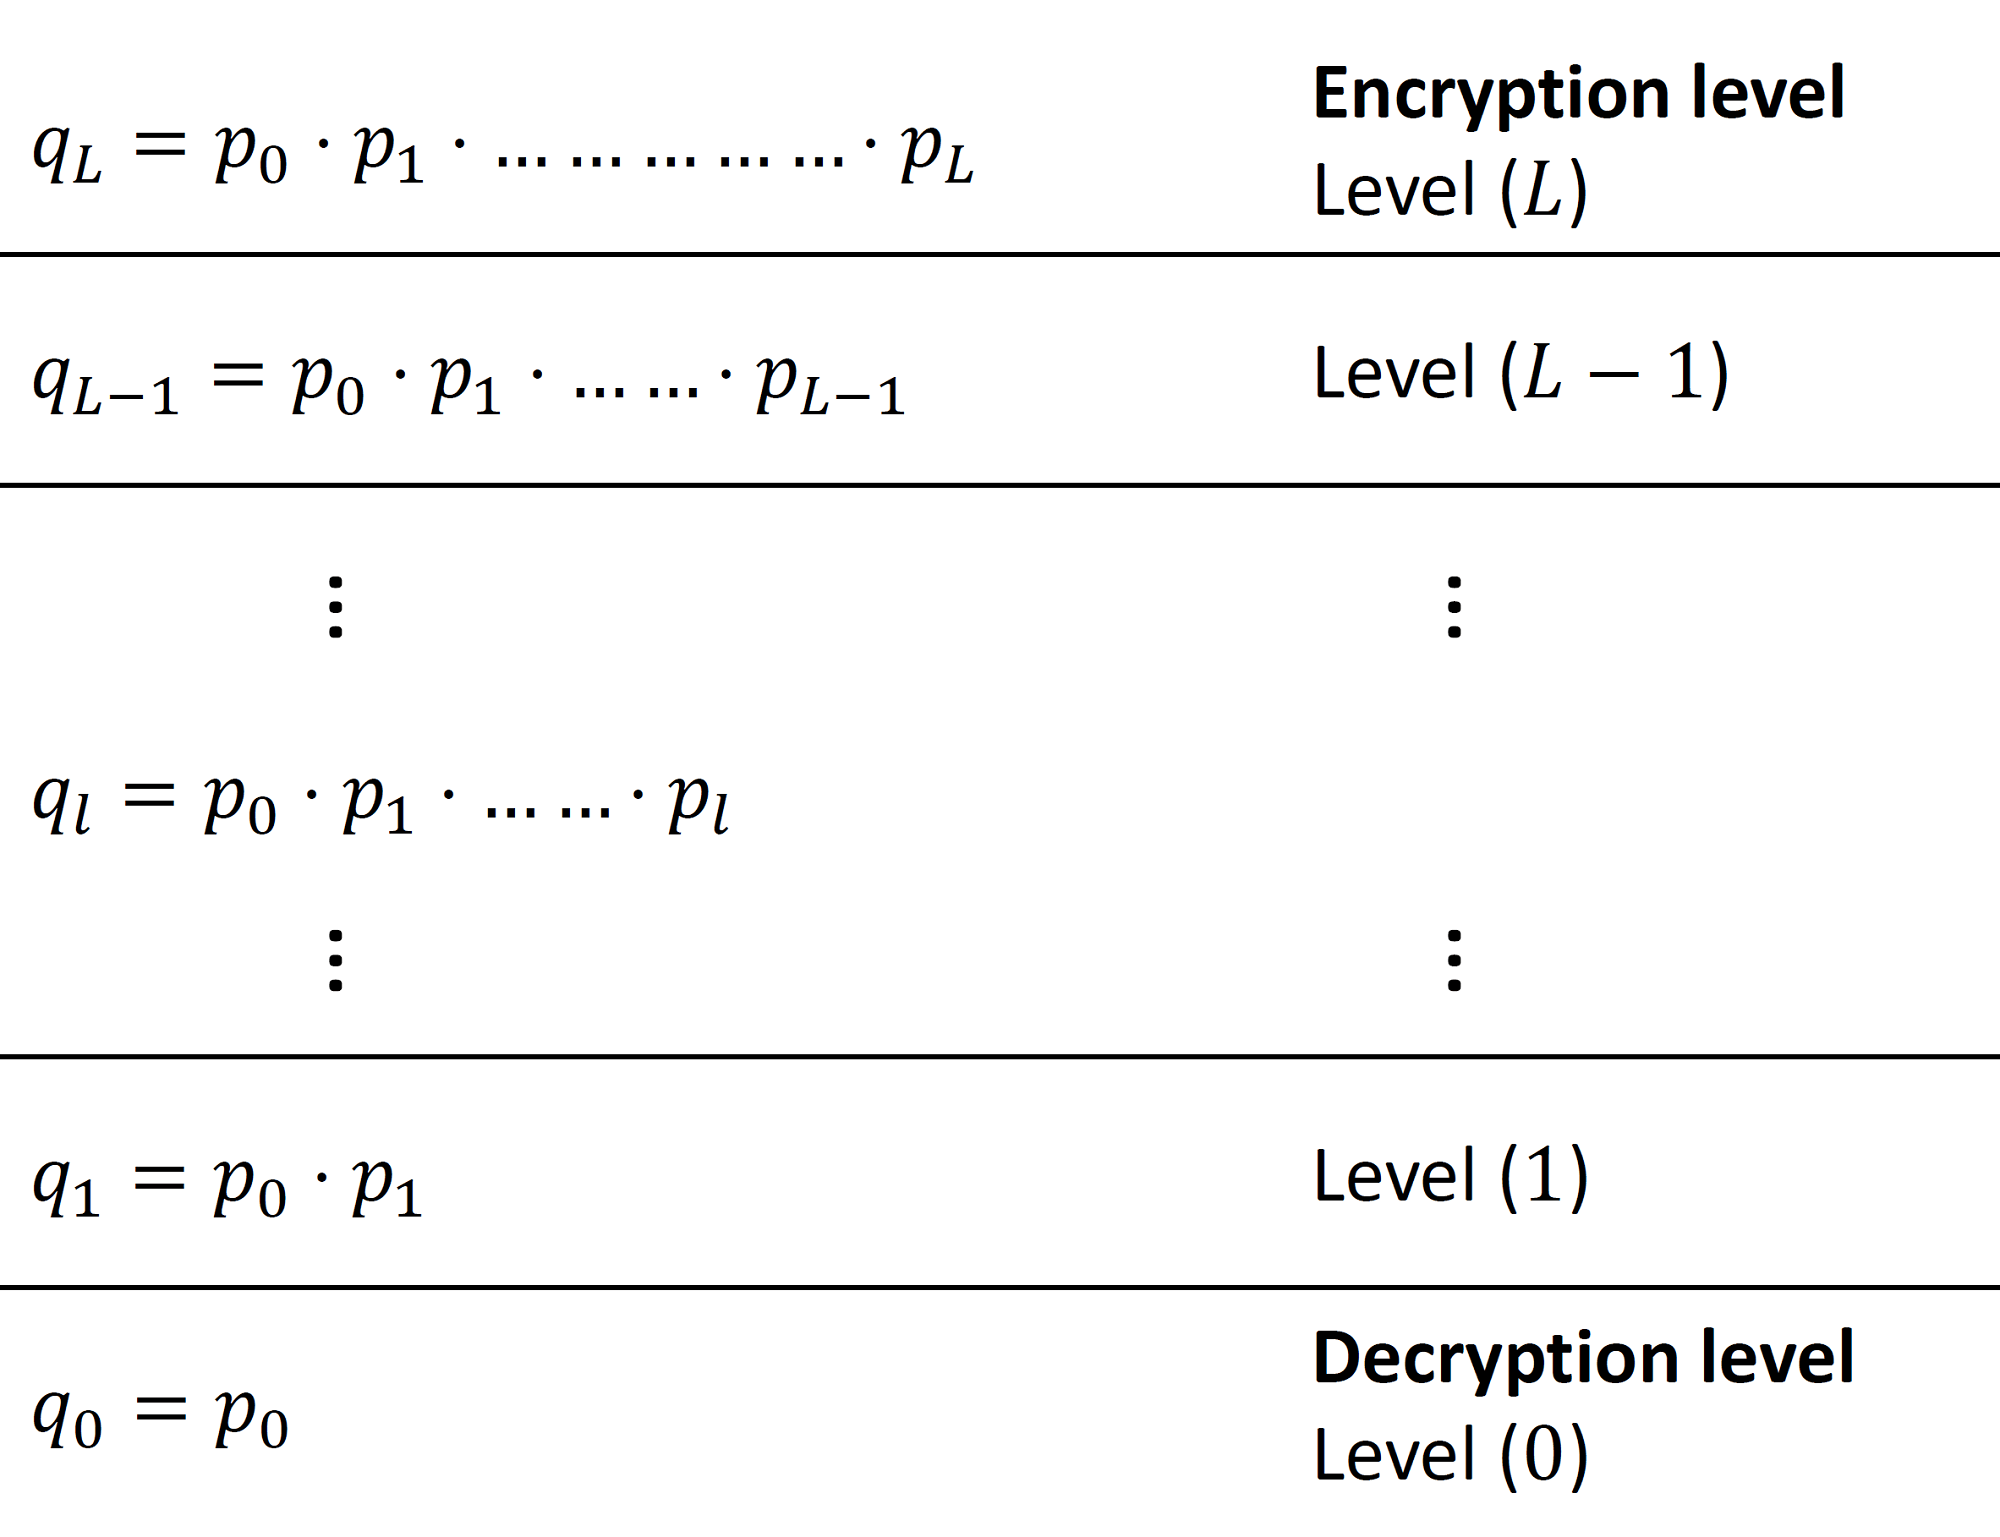 **figura 4** 

## 8. Bibliografia
1. Ilaria Chillotti. TFHE Deep Dive. https://www.zama.ai/post/tfhe-deep-dive-part-1
2. Various authors. Homomorphic encryption. https://en.wikipedia.org/wiki/Homomorphic_encryption
3. R. L. Rivest, L. Adleman, and M. L. Dertouzos. On data banks and privacy homomorphisms. In Foundations of Secure Computation, 1978.
4. Craig Gentry. Fully Homomorphic Encryption Using Ideal Lattices. In the 41st ACM Symposium on Theory of Computing (STOC), 2009.
5. HElib. https://homenc.github.io/HElib/
6. MS SEAL. https://www.microsoft.com/en-us/research/project/microsoft-seal/
7. Lattigo. https://github.com/tuneinsight/lattigo
8. Openfhe. https://www.openfhe.org/
9. Geelen, R., Vercauteren, F. Bootstrapping for BGV and BFV Revisited. J Cryptol 36, 12 (2023). https://doi.org/10.1007/s00145-023-09454-6
10. Ahmad Al Badawi, & Yuriy Polyakov. (2023). Demystifying Bootstrapping in Fully Homomorphic Encryption.https://eprint.iacr.org/2023/149 .
11. TFHE-rs. https://github.com/zama-ai/tfhe-rs
12. https://homomorphicencryption.org/
13. SEAL-Python. Zhigang Chen's team. https://zhigang-chen.github.io/, https://github.com/Huelse/SEAL-Python
14. Introduction to the BGV encryption scheme. https://www.inferati.com/blog/fhe-schemes-bgv
15. Introduction to the BFV encryption scheme. https://www.inferati.com/blog/fhe-schemes-bfv
16. Kim, A., Polyakov, Y., Zucca, V. (2021). Revisiting Homomorphic Encryption Schemes for Finite Fields. In: Tibouchi, M., Wang, H. (eds) Advances in Cryptology – ASIACRYPT 2021. ASIACRYPT 2021. Lecture Notes in Computer Science(), vol 13092. Springer, Cham. https://doi.org/10.1007/978-3-030-92078-4_21
17. Chillotti, I., Joye, M., Paillier, P. (2021). Programmable Bootstrapping Enables Efficient Homomorphic Inference of Deep Neural Networks. In: Dolev, S., Margalit, O., Pinkas, B., Schwarzmann, A. (eds) Cyber Security Cryptography and Machine Learning. CSCML 2021. Lecture Notes in Computer Science(), vol 12716. Springer, Cham. https://doi.org/10.1007/978-3-030-78086-9_1
18. Li, B., Micciancio, D. (2021). On the Security of Homomorphic Encryption on Approximate Numbers. In: Canteaut, A., Standaert, FX. (eds) Advances in Cryptology – EUROCRYPT 2021. EUROCRYPT 2021. Lecture Notes in Computer Science(), vol 12696. Springer, Cham. https://doi.org/10.1007/978-3-030-77870-5_23
19. Chillotti, I., Gama, N., Georgieva, M., Izabachène, M. (2016). Faster Fully Homomorphic Encryption: Bootstrapping in Less Than 0.1 Seconds. In: Cheon, J., Takagi, T. (eds) Advances in Cryptology – ASIACRYPT 2016. ASIACRYPT 2016. Lecture Notes in Computer Science(), vol 10031. Springer, Berlin, Heidelberg. https://doi.org/10.1007/978-3-662-53887-6_1